In [1]:
#!pip install yfinance --upgrade --no-cache-dir

  Running setup.py install for multitasking: started
    Running setup.py install for multitasking: finished with status 'done'
  Running setup.py install for yfinance: started
    Running setup.py install for yfinance: finished with status 'done'


In [17]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
import chart_studio as cs
from IPython.display import display, HTML
import seaborn as sns
import yfinance as yf
%matplotlib inline


In [18]:
#estrapolo i dati dal 2011 al 2017 per trovare la combinazione di portafoglio adeguata
assets=['T', 'WMB', 'IRM', 'MO', 'PM','D','PGR','GIL','IBM','VZ', 'PPL', 'K','DUK', 'PFE','PSA',
       'IP', 'SO','KMI','XOM']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a]= wb.DataReader(a,data_source='yahoo', start ='2015-1-1' , end='2017-1-1')['Adj Close']

In [19]:
pf_data['T']
pf_data.index


DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=504, freq=None)

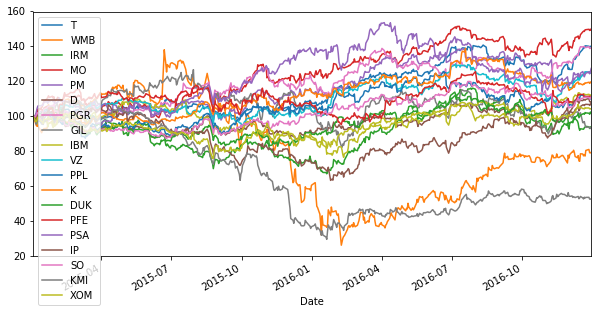

In [20]:
#normalizzo e plotto l'andamento fino al 2017 (!!!!!importante normalizzare cosi posso paragonare i risultati)
(pf_data/pf_data.iloc[0]*100).plot(figsize=(10,5))

In [21]:
#calcolo ritorno logaritmico gioraliero degli assets mel periodo selezionato
log_returns =np.log(pf_data/pf_data.shift(1))


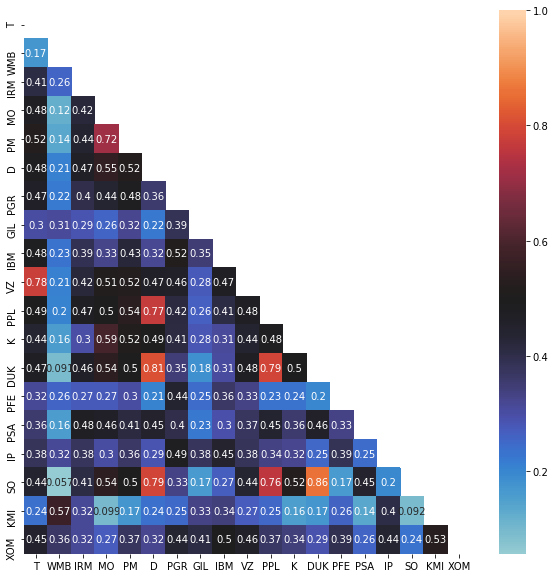

In [22]:
#cambia center per capire meglio la correlazione 
correlation = log_returns.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,center=0.5,annot=True,mask=mask,ax=ax);

In [23]:
#percentuale di ritorno annua media di ogni stocks
log_returns.mean()*250*100

T      16.551399
WMB   -11.501709
IRM    -3.077211
MO     19.879840
PM     11.113528
D       3.146241
PGR    16.294268
GIL    -3.651493
IBM     5.502814
VZ     10.926542
PPL     4.790808
K       8.706112
DUK     0.911123
PFE     5.269183
PSA    11.974008
IP      3.647352
SO      4.953923
KMI   -32.007396
XOM     2.006208
dtype: float64

In [30]:
#genero tot combinazioni di peso per il tuo portafoglio (nel ciclo for inserisci il n combinazioni) per
#valutare tutte le possibili combinazioni di peso, scegliendo poi quella ottima
num_assets=len(assets)
pfoglio_returns=[]
pfoglio_volatilities=[]
pfoglio_weights=[]
pfoglio_sharpe_ratio = []
risk_free = 0.025 #bot 10 anni US
np.random.seed(333)
for x in range (50000):
    
    weights=np.random.random(num_assets)
    weights/=np.sum(weights)
    weights = np.around(weights,4)
    returns = np.around(np.sum(weights* log_returns.mean())*250,4)  
    volatility = np.around(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250,weights))),4)
    sharpe_ratio = np.around((returns - risk_free)/volatility,2)
    
    pfoglio_weights.append(weights)
    pfoglio_returns.append(returns)
    pfoglio_volatilities.append(volatility)
    pfoglio_sharpe_ratio.append(sharpe_ratio)

portfoglios=pd.DataFrame({'Return': pfoglio_returns, 'Volatility': pfoglio_volatilities,
                          'Sharpe Ratio': pfoglio_sharpe_ratio})
portfoglios=pd.concat([portfoglios, pd.DataFrame(pfoglio_weights)], axis=1);
columns_name = [ 'Returns', 'Volatility','Sharpe Ratio'] + ["Weight_" + assets for assets in assets]
portfoglios.columns= columns_name

In [31]:
portfoglios.head()



,Returns,Volatility,Sharpe Ratio,Weight_T,Weight_WMB,Weight_IRM,Weight_MO,Weight_PM,Weight_D,Weight_PGR,...,Weight_VZ,Weight_PPL,Weight_K,Weight_DUK,Weight_PFE,Weight_PSA,Weight_IP,Weight_SO,Weight_KMI,Weight_XOM
0,0.0305,0.1613,0.03,0.0791,0.1061,0.0025,0.0481,0.0537,0.0070,0.0152,...,0.1271,0.0075,0.0088,0.0347,0.0296,0.0254,0.0605,0.1371,0.0680,0.1397
1,0.0572,0.1527,0.21,0.1358,0.0986,0.0658,0.0172,0.0143,0.0057,0.0332,...,0.0273,0.1199,0.0333,0.0157,0.0804,0.0962,0.0177,0.0161,0.0005,0.0773
2,0.0655,0.1323,0.31,0.0486,0.0344,0.0267,0.0351,0.0929,0.0992,0.0986,...,0.0875,0.0523,0.0722,0.0192,0.0650,0.0552,0.0565,0.0195,0.0328,0.0184
3,0.0611,0.1315,0.27,0.0813,0.0379,0.0177,0.0430,0.0235,0.0550,0.0496,...,0.0929,0.0158,0.0420,0.1024,0.0085,0.1311,0.0123,0.1007,0.0204,0.0734
4,0.0369,0.1456,0.08,0.0609,0.0583,0.0755,0.0730,0.0071,0.0618,0.0731,...,0.0195,0.0094,0.0417,0.0244,0.0800,0.0442,0.0837,0.0444,0.0542,0.0482


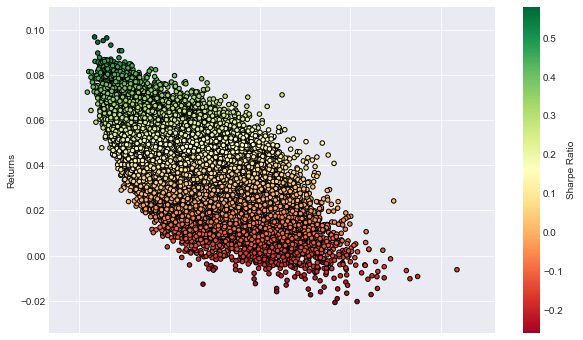

In [32]:
#plottiamo i dati delle combinazioni di portafoglio 
#portfoglios.iplot(x='Volatility', y='Returns', kind='scatter',mode='markers',size=5);
plt.style.use('seaborn-dark')
portfoglios.plot( x='Volatility', y='Returns', kind='scatter',figsize=(10,6),
                  c='Sharpe Ratio', cmap='RdYlGn', edgecolors='black',grid=True);


In [33]:
min_volatility = portfoglios['Volatility'].min()
max_sharpe = portfoglios['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = portfoglios.loc[portfoglios['Sharpe Ratio'] == max_sharpe]
min_variance_port = portfoglios.loc[portfoglios['Volatility'] == min_volatility]

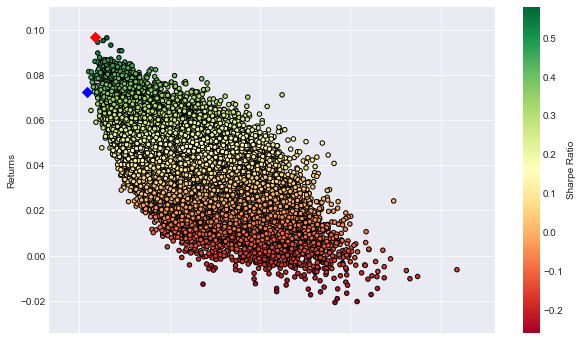

In [34]:
plt.style.use('seaborn-dark')
portfoglios.plot( x='Volatility', y='Returns', kind='scatter',figsize=(10,6),
                  c='Sharpe Ratio', cmap='RdYlGn', edgecolors='black',grid=True);
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], 
            c='red', marker='D', s=50);
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], 
            c='blue', marker='D', s=50);

In [320]:
display(min_variance_port)
display(sharpe_portfolio)


,Returns,Volatility,Sharpe Ratio,Weight_T,Weight_WMB,Weight_IRM,Weight_MO,Weight_PM,Weight_D,Weight_PGR,...,Weight_VZ,Weight_PPL,Weight_K,Weight_DUK,Weight_PFE,Weight_PSA,Weight_IP,Weight_SO,Weight_KMI,Weight_XOM
5248,0.0723,0.1218,0.39,0.0846,0.0031,0.0131,0.0989,0.0274,0.0829,0.0519,...,0.063,0.001,0.1064,0.004,0.0986,0.036,0.028,0.1302,0.0168,0.0062


,Returns,Volatility,Sharpe Ratio,Weight_T,Weight_WMB,Weight_IRM,Weight_MO,Weight_PM,Weight_D,Weight_PGR,...,Weight_VZ,Weight_PPL,Weight_K,Weight_DUK,Weight_PFE,Weight_PSA,Weight_IP,Weight_SO,Weight_KMI,Weight_XOM
908,0.0869,0.127,0.49,0.0997,0.0068,0.0253,0.0819,0.0918,0.0364,0.0702,...,0.0705,0.0181,0.1027,0.0051,0.0857,0.0755,0.0981,0.0069,0.0191,0.0332


In [ ]:
#inserisci il capitale da invesitre
capitale=100
for i in range(num_assets):
    print(assets[i] + ' = ' + str(round(pweights[indice][i]*capitale,2) ))

    

In [ ]:

values = pweights[indice]
colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=assets, values=values,
               hoverinfo='label+percent', textinfo='value',
               textfont=dict(size=20),
               marker=dict(colors=colors,
                           line=dict(color='#000000', width=2)))

py.iplot([trace], filename='styled_pie_chart')

In [71]:
#comparo rendimenti e volatilità
print('Tuo portafoglio ------------------>' + ' Ritorno'+' = '+str(round(rit,3)*100)+ '%  ' + 'Volatilità' + ' = '+ str(round(vol,3)*100)+'%')
print('Portafoglio volatilità minima ---->' + ' Ritorno'+' = '+str(round(pfoglio_returns[indice],3)*100)+ '%  ' + 'Volatilità' + ' = '+ str(round(pfoglio_volatilities[indice],3)*100)+'%')

Tuo portafoglio ------------------> Ritorno = 16.2%  Volatilità = 21.4%
Portafoglio volatilità minima ----> Ritorno = 18.099999999999998%  Volatilità = 19.2%


In [72]:
#testiamo i tuoi portafoglio dal 2017 in poi (fingo che ci troviamo nel 2017, costruisco i portafogli con i dati fino al 2017)
#dal 2017 ad oggi lo considero futuro.
#vediamo cosa succede

In [75]:
#estrapolo i dati dal 2017 in poi 
assets=['AVGO', 'GOOG', 'AMZN','AAPL', 'MSFT','INTC','ISRG','FTNT','SPLK','V']
pf_data2 = pd.DataFrame()

for a in assets:
    pf_data2[a]= wb.DataReader(a,data_source='yahoo', start ='2013-1-1')['Adj Close']

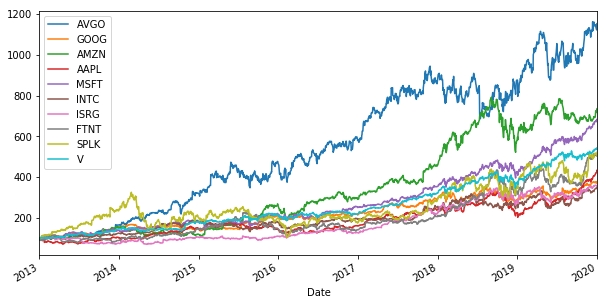

In [76]:
#normalizzo e plotto l'andamento dal 2017 a oggi
(pf_data2/pf_data2.iloc[0]*100).plot(figsize=(10,5))

In [77]:
#wooooooo che andamento apps


In [78]:
#adesso inizia il processo di calcolo dei rendimenti e volaitilà del tuo portafoglio e quello fatto per avere volatilità minima
#calcolo ritorno logaritmico gioraliero degli assets
log_returns2 =np.log(pf_data2/pf_data2.shift(1))

In [79]:
#percentuale di ritorno annua media di ogni stocks
log_returns2.mean()*250*100

AVGO    34.330331
GOOG    18.843713
AMZN    28.163164
AAPL    20.749301
MSFT    27.122090
INTC    17.631845
ISRG    18.076350
FTNT    23.509514
SPLK    23.370019
V       23.950200
dtype: float64

In [80]:
rit2=np.sum(weights_iniziali * log_returns2.mean())*250
vol2=np.sqrt(np.dot(weights_iniziali.T, np.dot(log_returns2.cov()*250,weights_iniziali)))
rit_pm=np.sum(pweights[indice] * log_returns2.mean())*250
vol_pm=np.sqrt(np.dot(pweights[indice].T, np.dot(log_returns2.cov()*250,pweights[indice])))
print('Tuo portafoglio ------------------>' + ' Ritorno'+' = '+str(round(rit2,3)*100)+ '%  ' + 'Volatilità' + ' = '+ str(round(vol2,3)*100)+'%')
print('Portafoglio volatilità minima ---->' + ' Ritorno'+' = '+str(round(rit_pm,3)*100)+ '%  ' + 'Volatilità' + ' = '+ str(round(vol_pm,3)*100)+'%')


Tuo portafoglio ------------------> Ritorno = 23.599999999999998%  Volatilità = 18.8%
Portafoglio volatilità minima ----> Ritorno = 22.3%  Volatilità = 17.4%


In [81]:
#genero tot combinazioni di peso per il tuo portafoglio (nel ciclo for inserisci il n combinazioni) per
#valutare tutte le possibili combinazioni di peso, scegliendo poi quella ottima
num_assets=len(assets)
pfoglio_returns2=[]
pfoglio_volatilities2=[]
pweights2=[]
for x in range (10000):
    weights2=np.random.random(num_assets)
    weights2/=np.sum(weights2)
    pweights.append(weights2)
   
    pfoglio_returns2.append(np.sum(weights2* log_returns2.mean())*250)
    pfoglio_volatilities2.append(np.sqrt(np.dot(weights2.T, np.dot(log_returns2.cov()*250,weights2))))

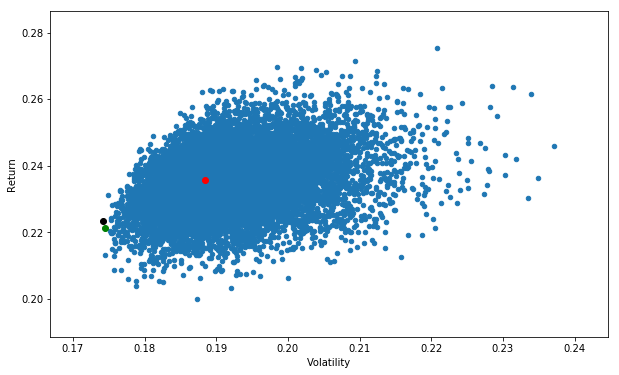

In [86]:
#plottiamo i dati delle combinazioni di portafoglio 
portfoglios=pd.DataFrame({'Return': pfoglio_returns2, 'Volatility': pfoglio_volatilities2})

portfoglios.plot( x='Volatility', y='Return', kind='scatter',figsize=(10,6))
#il tuo portafoglio iniziale
plt.plot(vol2,rit2,'ro')
#vecchio con volatilità minima
plt.plot(vol_pm,rit_pm,'ko')
#nuovo volatilità minima
indice=pfoglio_volatilities2.index(min(pfoglio_volatilities2))
plt.plot(pfoglio_volatilities2[indice],pfoglio_returns2[indice],'go')